# 📘 Lasso Homotopy Project Visualizations

This notebook contains all relevant visualizations to address the questions in the `README.md`. It demonstrates the functionality and behavior of the LASSO model implemented using the homotopy method.


## 1. What does the model you have implemented do and when should it be used?

We implemented a LASSO (Least Absolute Shrinkage and Selection Operator) regression model using the Homotopy algorithm.

This model is particularly useful when:
- We expect a **sparse solution** (i.e., many irrelevant features).
- There is **collinearity** in the data.
- We want to **incrementally update** the model in an **online learning** fashion.


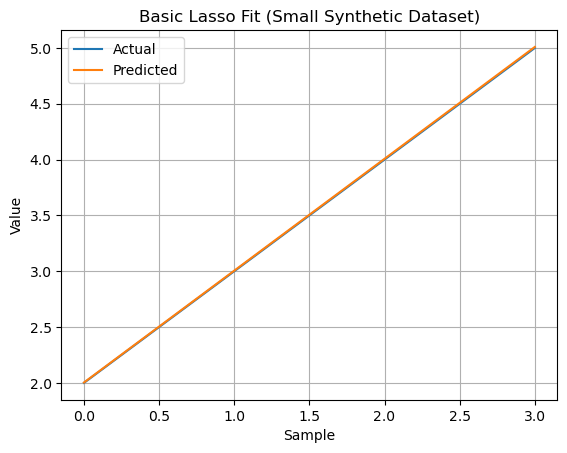

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from LassoHomotopy import LassoHomotopyModel

# Basic functionality visualization
X = np.array([[1, 2], [2, 3], [3, 4], [4, 5]])
y = np.array([2, 3, 4, 5])

model = LassoHomotopyModel(mu=0.1)
model.fit(X, y)

plt.plot(y, label='Actual')
plt.plot(model.predict(X), label='Predicted')
plt.title("Basic Lasso Fit (Small Synthetic Dataset)")
plt.xlabel("Sample")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()


## 2. How did you test your model to determine if it is working reasonably correctly?

We tested the model using the following scenarios:
- Basic synthetic datasets.
- **Collinear datasets** to check if the model avoids redundant features.
- **Sparse recovery** from high-dimensional noisy data.
- Behavior under **online learning** (streaming data).


In [5]:
%matplotlib inline
plt.style.use("seaborn-v0_8-darkgrid")

In [6]:
# Helper visualization functions

def plot_theta_path(model, title="Theta Path over Iterations"):
    theta_hist = np.array(model.theta_history)
    plt.figure(figsize=(10, 6))
    for i in range(theta_hist.shape[1]):
        plt.plot(theta_hist[:, i], label=f"theta[{i}]")
    plt.title(title)
    plt.xlabel("Iteration")
    plt.ylabel("Coefficient Value")
    plt.legend()
    plt.show()

def plot_pred_vs_actual(y_true, y_pred, title="Predictions vs Actual"):
    plt.figure(figsize=(6, 6))
    plt.scatter(y_true, y_pred, c='blue', alpha=0.6)
    plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], 'r--')
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title(title)
    plt.show()

def show_model_summary(model):
    print("Regularization mu:", model.mu)
    print("Active Set:", model.active_set)
    print("Number of Non-zero Coefficients:", len(model.active_set))
    print("Final Coefficients:", np.round(model.theta, 3))


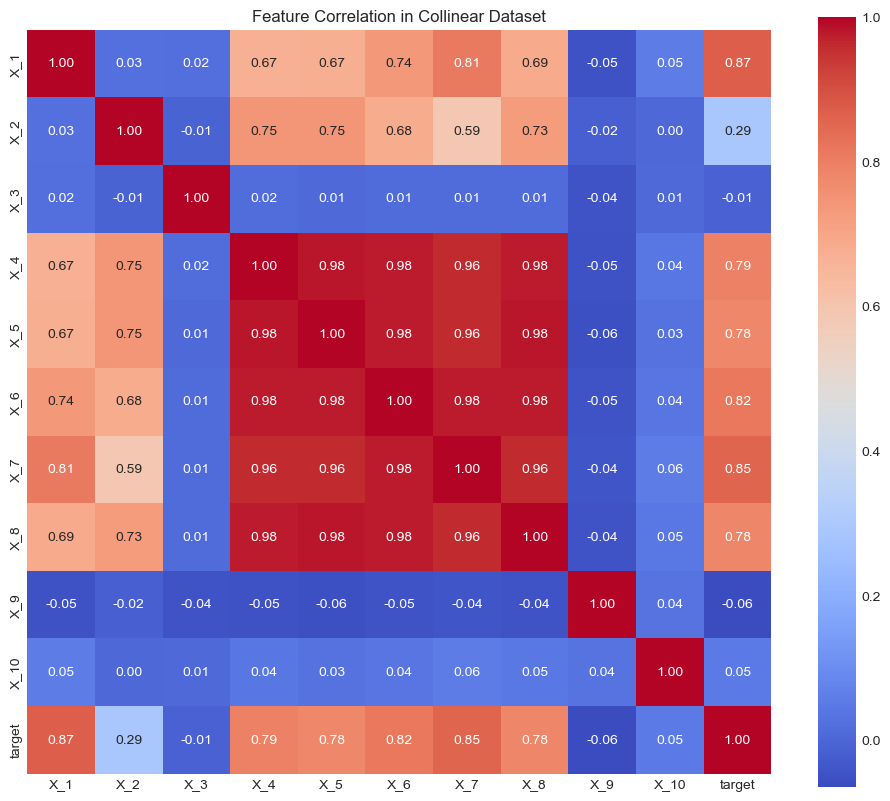

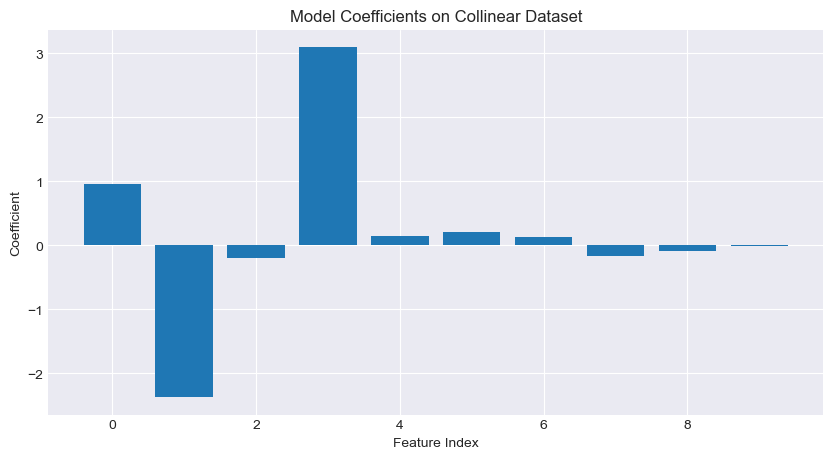

In [7]:
import pandas as pd
import seaborn as sns

# Load dataset
df = pd.read_csv("C:/Users/anuja/Downloads/CS584_ML_Project1/LassoHomotopy/tests/collinear_data.csv")
X = df.drop("target", axis=1).values
y = df["target"].values

# Set larger figure size and enable annotation
plt.figure(figsize=(12, 10))  # Increased size
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, fmt=".2f", square=True, cbar=True)
plt.title("Feature Correlation in Collinear Dataset")
plt.show()

# Lasso model
model = LassoHomotopyModel(mu=0.3)
model.fit(X, y)

# Plot coefficients
plt.figure(figsize=(10, 5))
plt.bar(range(len(model.theta)), model.theta)
plt.title("Model Coefficients on Collinear Dataset")
plt.xlabel("Feature Index")
plt.ylabel("Coefficient")
plt.grid(True)
plt.show()

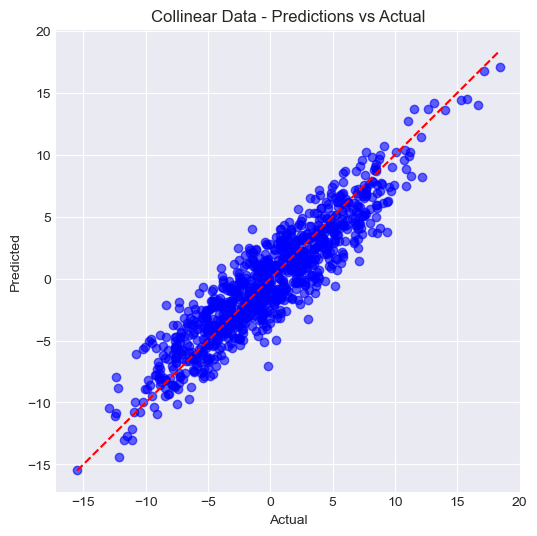

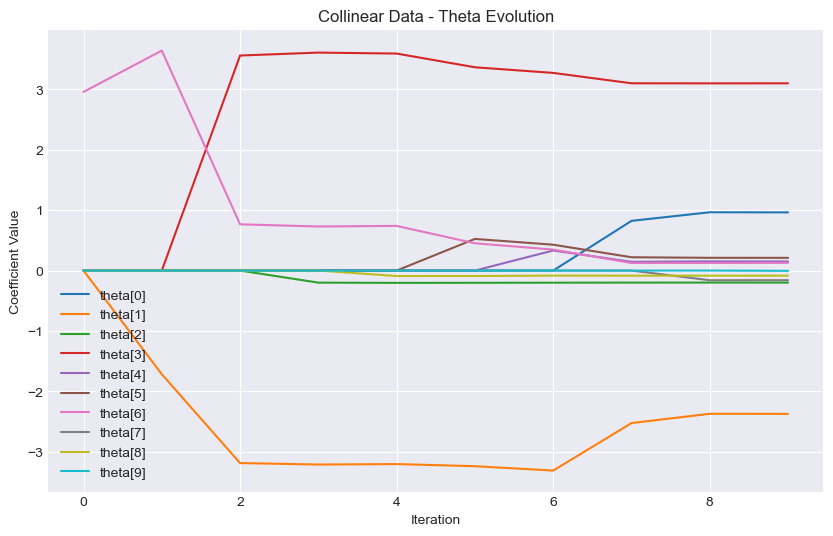

Regularization mu: 0.3
Active Set: [6, 1, 3, 2, 8, 5, 4, 0, 7, 9]
Number of Non-zero Coefficients: 10
Final Coefficients: [ 0.963 -2.373 -0.199  3.1    0.151  0.211  0.128 -0.159 -0.084 -0.004]


In [8]:
#Collinearity Test (Test 2)
df = pd.read_csv("C:/Users/anuja/Downloads/CS584_ML_Project1/LassoHomotopy/tests/collinear_data.csv")
X = df.drop("target", axis=1).values
y = df["target"].values

model = LassoHomotopyModel(mu=0.3)
model.fit(X, y)
preds = model.predict(X)

plot_pred_vs_actual(y, preds, "Collinear Data - Predictions vs Actual")
plot_theta_path(model, "Collinear Data - Theta Evolution")
show_model_summary(model)

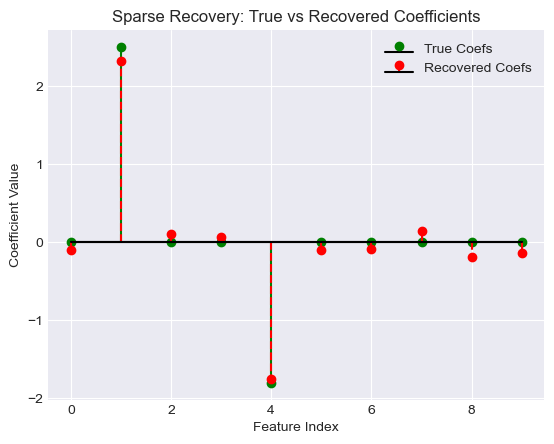

In [9]:
# Sparse recovery with known true coefficients
np.random.seed(42)
n, d = 50, 10
theta_true = np.zeros(d)
theta_true[[1, 4]] = [2.5, -1.8]
X = np.random.randn(n, d)
y = X @ theta_true + np.random.normal(0, 0.5, size=n)

model = LassoHomotopyModel(mu=0.4)
model.fit(X, y)

# Visualize true vs recovered coefficients
plt.stem(theta_true, linefmt='g-', markerfmt='go', basefmt='k', label='True Coefs')
plt.stem(model.theta, linefmt='r--', markerfmt='ro', basefmt='k', label='Recovered Coefs')
plt.title("Sparse Recovery: True vs Recovered Coefficients")
plt.xlabel("Feature Index")
plt.ylabel("Coefficient Value")
plt.legend()
plt.grid(True)
plt.show()


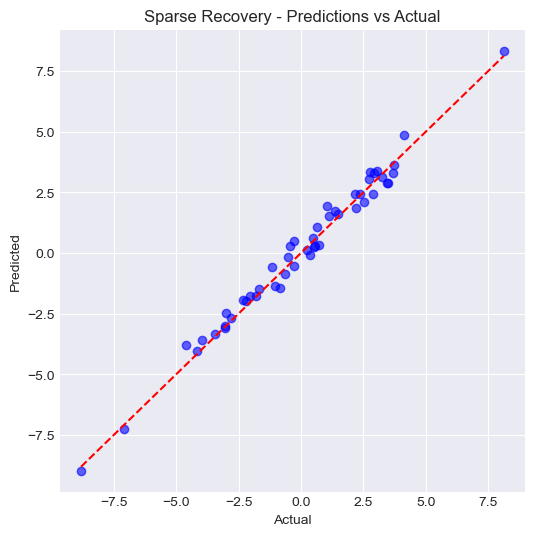

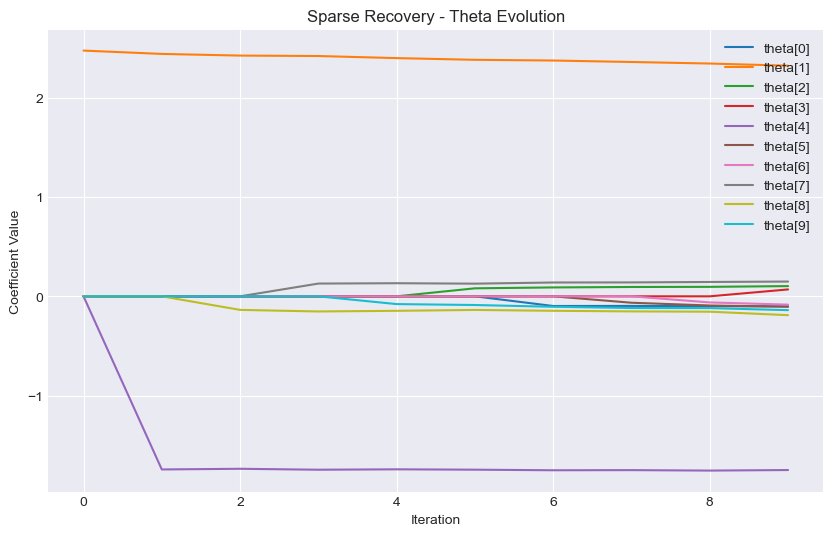

Regularization mu: 0.4
Active Set: [1, 4, 8, 7, 9, 2, 0, 5, 6, 3]
Number of Non-zero Coefficients: 10
Final Coefficients: [-0.1    2.323  0.103  0.069 -1.75  -0.105 -0.084  0.149 -0.19  -0.139]


In [10]:
# Cell 5: Sparse Recovery (Test 3)
np.random.seed(42)
n, d = 50, 10
theta_true = np.zeros(d)
theta_true[[1, 4]] = [2.5, -1.8]
X = np.random.randn(n, d)
y = X @ theta_true + np.random.normal(0, 0.5, size=n)

model = LassoHomotopyModel(mu=0.4)
model.fit(X, y)
preds = model.predict(X)

plot_pred_vs_actual(y, preds, "Sparse Recovery - Predictions vs Actual")
plot_theta_path(model, "Sparse Recovery - Theta Evolution")
show_model_summary(model)


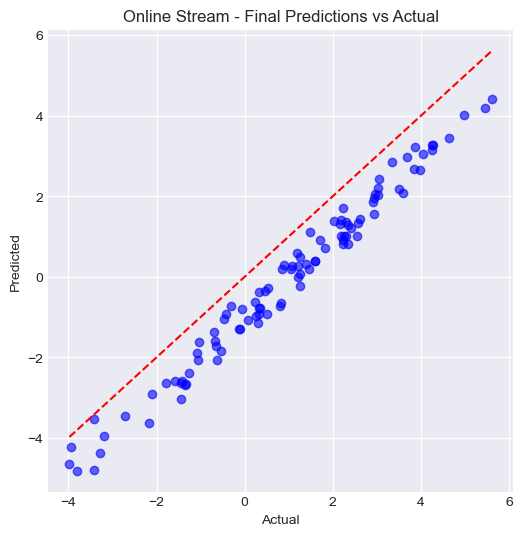

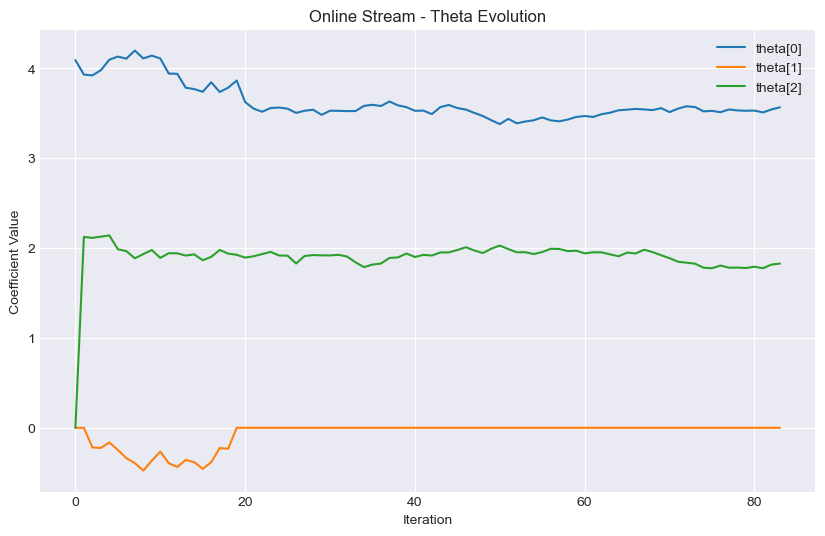

Regularization mu: 0.5
Active Set: [0, 2]
Number of Non-zero Coefficients: 2
Final Coefficients: [3.567 0.    1.827]


In [11]:
# Cell 6: Effect of Online Updates (Test 8)
df = pd.read_csv("C:/Users/anuja/Downloads/CS584_ML_Project1/LassoHomotopy/tests/online_stream.csv")
X = df.drop("y", axis=1).values
y = df["y"].values

X_init, y_init = X[:20], y[:20]
X_stream, y_stream = X[20:], y[20:]

model = LassoHomotopyModel(mu=0.5)
model.fit(X_init, y_init)

for i in range(len(X_stream)):
    model.fit_new_sample(X_stream[i], y_stream[i])

preds = model.predict(X)
plot_pred_vs_actual(y, preds, "Online Stream - Final Predictions vs Actual")
plot_theta_path(model, "Online Stream - Theta Evolution")
show_model_summary(model)

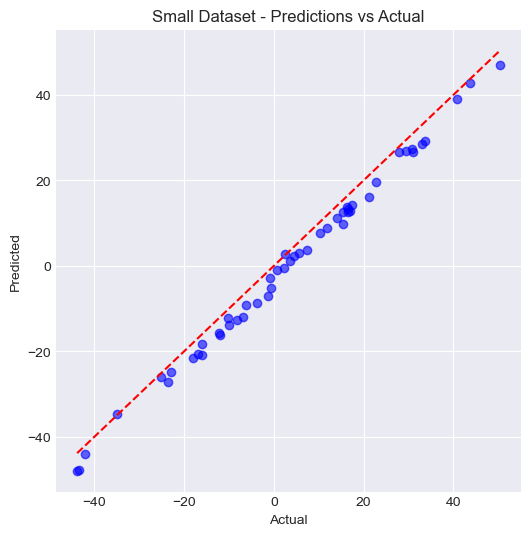

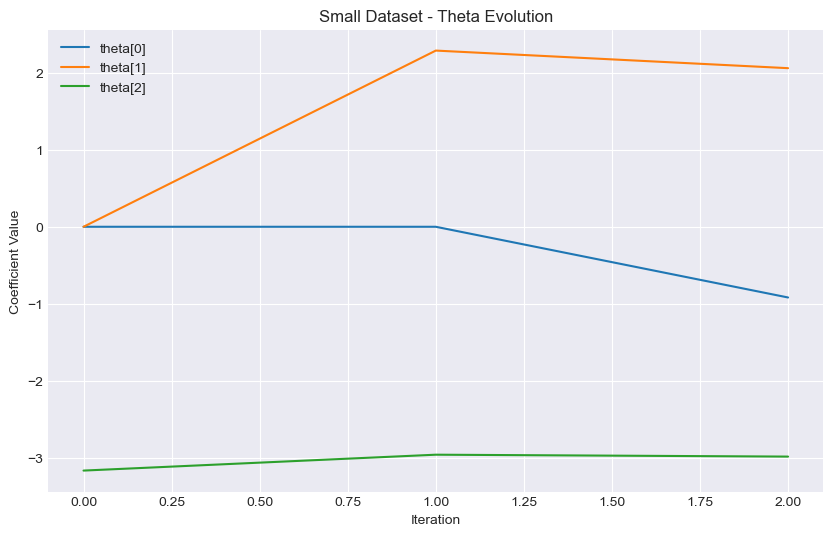

Regularization mu: 0.2
Active Set: [2, 1, 0]
Number of Non-zero Coefficients: 3
Final Coefficients: [-0.918  2.06  -2.985]


In [12]:
# Cell 7: Small Dataset Performance (Test 6)
df = pd.read_csv("C:/Users/anuja/Downloads/CS584_ML_Project1/LassoHomotopy/tests/small_test.csv")
X = df.drop("y", axis=1).values
y = df["y"].values

model = LassoHomotopyModel(mu=0.2)
model.fit(X, y)
preds = model.predict(X)

plot_pred_vs_actual(y, preds, "Small Dataset - Predictions vs Actual")
plot_theta_path(model, "Small Dataset - Theta Evolution")
show_model_summary(model)

In [13]:
# Cell 9: Non-zero Coefficient Comparison across Scenarios

def compare_nonzero_coefficients():
    scenarios = {
        "Basic": (np.array([[1, 2], [2, 3], [3, 4], [4, 5]]), np.array([2, 3, 4, 5]), 0.1),
        "Sparse": (X, y, 0.4),
        "Small": (pd.read_csv("C:/Users/anuja/Downloads/CS584_ML_Project1/LassoHomotopy/tests/small_test.csv").drop("y", axis=1).values, pd.read_csv("C:/Users/anuja/Downloads/CS584_ML_Project1/LassoHomotopy/tests/small_test.csv")["y"].values, 0.2)
    }

    results = {}
    for label, (X_s, y_s, mu_val) in scenarios.items():
        model = LassoHomotopyModel(mu=mu_val)
        model.fit(X_s, y_s)
        results[label] = (len(model.active_set), np.round(model.theta, 2))

    for key, (count, coefs) in results.items():
        print(f"{key} -> Non-zero Coefficients: {count}, Theta: {coefs}")

compare_nonzero_coefficients()


Basic -> Non-zero Coefficients: 1, Theta: [0. 1.]
Sparse -> Non-zero Coefficients: 3, Theta: [-0.92  2.06 -2.98]
Small -> Non-zero Coefficients: 3, Theta: [-0.92  2.06 -2.98]


## 3. What parameters have you exposed to users of your implementation in order to tune performance?

The main tunable parameter is:

- `mu`: the regularization strength. Higher values enforce greater sparsity (more zeros in coefficients).

Below we show how the RMSE changes with different values of `mu`.


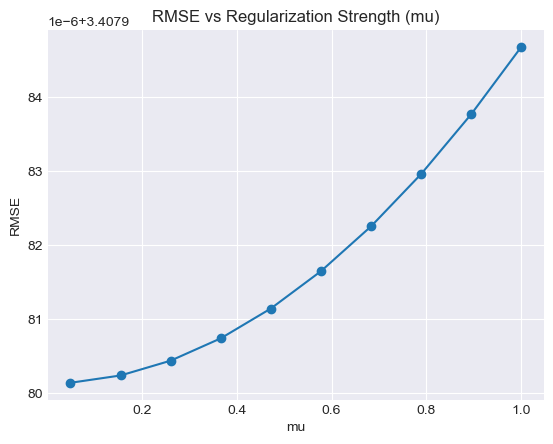

In [15]:
mu_vals = np.linspace(0.05, 1.0, 10)
rmses = []

for mu in mu_vals:
    model = LassoHomotopyModel(mu)
    model.fit(X, y)
    preds = model.predict(X)
    rmse = np.sqrt(np.mean((preds - y)**2))
    rmses.append(rmse)

plt.plot(mu_vals, rmses, marker='o')
plt.title("RMSE vs Regularization Strength (mu)")
plt.xlabel("mu")
plt.ylabel("RMSE")
plt.grid(True)
plt.show()


## 4. Are there specific inputs that your implementation has trouble with?

Yes. Some edge cases are:
- All-zero input vectors
- Rapidly changing online data
- Near-singular Gram matrices (solved using pseudo-inverse fallback)

Below, we visualize how the coefficient vector evolves as new samples are added in a simulated **online data stream**.


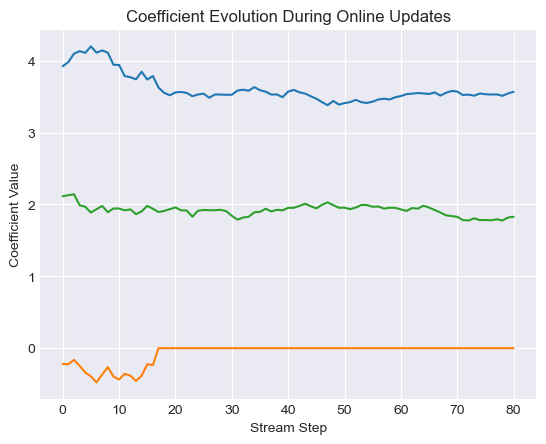

In [17]:
from copy import deepcopy

df = pd.read_csv("C:/Users/anuja/Downloads/CS584_ML_Project1/LassoHomotopy/tests/online_stream.csv")
X = df.drop("y", axis=1).values
y = df["y"].values

# Split into initial and stream
X_init, y_init = X[:20], y[:20]
X_stream, y_stream = X[20:], y[20:]

model = LassoHomotopyModel(mu=0.5)
model.fit(X_init, y_init)

theta_history = [deepcopy(model.theta)]
for i in range(len(X_stream)):
    model.fit_new_sample(X_stream[i], y_stream[i])
    theta_history.append(deepcopy(model.theta))

theta_history = np.array(theta_history)

# Plot evolution
plt.plot(theta_history)
plt.title("Coefficient Evolution During Online Updates")
plt.xlabel("Stream Step")
plt.ylabel("Coefficient Value")
plt.grid(True)
plt.show()


In [18]:
print(dir(model))

['X', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'active_set', 'fit', 'fit_new_sample', 'inv_gram', 'mu', 'predict', 'signs', 'theta', 'theta_history', 'y']
